In [4]:
from google.colab import files
uploaded = files.upload()


Saving wine_quality_knn_dataset.csv to wine_quality_knn_dataset.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


In [6]:
df = pd.read_csv("wine_quality_knn_dataset.csv")
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,10.0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
X = df.drop("quality", axis=1)
y = df["quality"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)


In [9]:
knn_r = KNeighborsRegressor(n_neighbors=3)
knn_r.fit(X_train_r_scaled, y_train_r)
y_pred_r = knn_r.predict(X_test_r_scaled)

print(f"MSE: {mean_squared_error(y_test_r, y_pred_r):.2f}")
print(f"R² Score: {r2_score(y_test_r, y_pred_r):.2f}")


MSE: 0.04
R² Score: 0.00


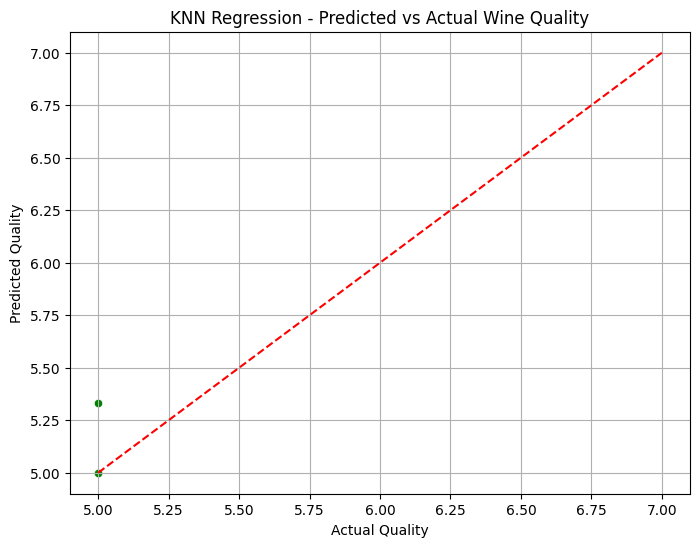

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_r, y=y_pred_r, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("KNN Regression - Predicted vs Actual Wine Quality")
plt.grid(True)
plt.show()


In [12]:
df['quality_label'] = df['quality'].apply(lambda q: 'low' if q <= 5 else ('high' if q >= 7 else 'medium'))
label_map = {'low': 0, 'medium': 1, 'high': 2}
df['quality_label'] = df['quality_label'].map(label_map)

X_c = df.drop(['quality', 'quality_label'], axis=1)
y_c = df['quality_label']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42)

scaler_c = StandardScaler()
X_train_c_scaled = scaler_c.fit_transform(X_train_c)
X_test_c_scaled = scaler_c.transform(X_test_c)


In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_c_scaled, y_train_c)
y_pred_c = knn_clf.predict(X_test_c_scaled)

print("Classification Report:\n", classification_report(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
 [[3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


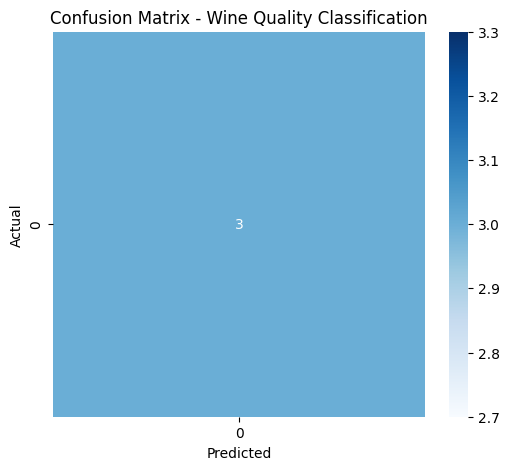

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Wine Quality Classification")
plt.show()
